# ABCB7
[X-linked spinocerebellar ataxia-6 with or without sideroblastic anemia (SCAX6)](https://omim.org/entry/301310) is caused by hemizygous mutation in the ABCB7 gene.
We could not identify previously published genotype-phenotype correlations.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


## ABCB7
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ABCB7.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'ABCB7'
mane_tx_id = 'NM_001271696.3'
mane_protein_id = 'NP_001258625.1' # iron-sulfur clusters transporter ABCB7, mitochondrial isoform 2

pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)


In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 18/18 [00:00<00:00, 1526.47 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
15,Global developmental delay
15,Dysarthria
11,Nonprogressive cerebellar ataxia
9,Postural instability
9,Nystagmus
8,Increased erythrocyte protoporphyrin concentration
7,Cerebellar hypoplasia
7,Gait disturbance
5,Ophthalmoplegia
5,Anemia


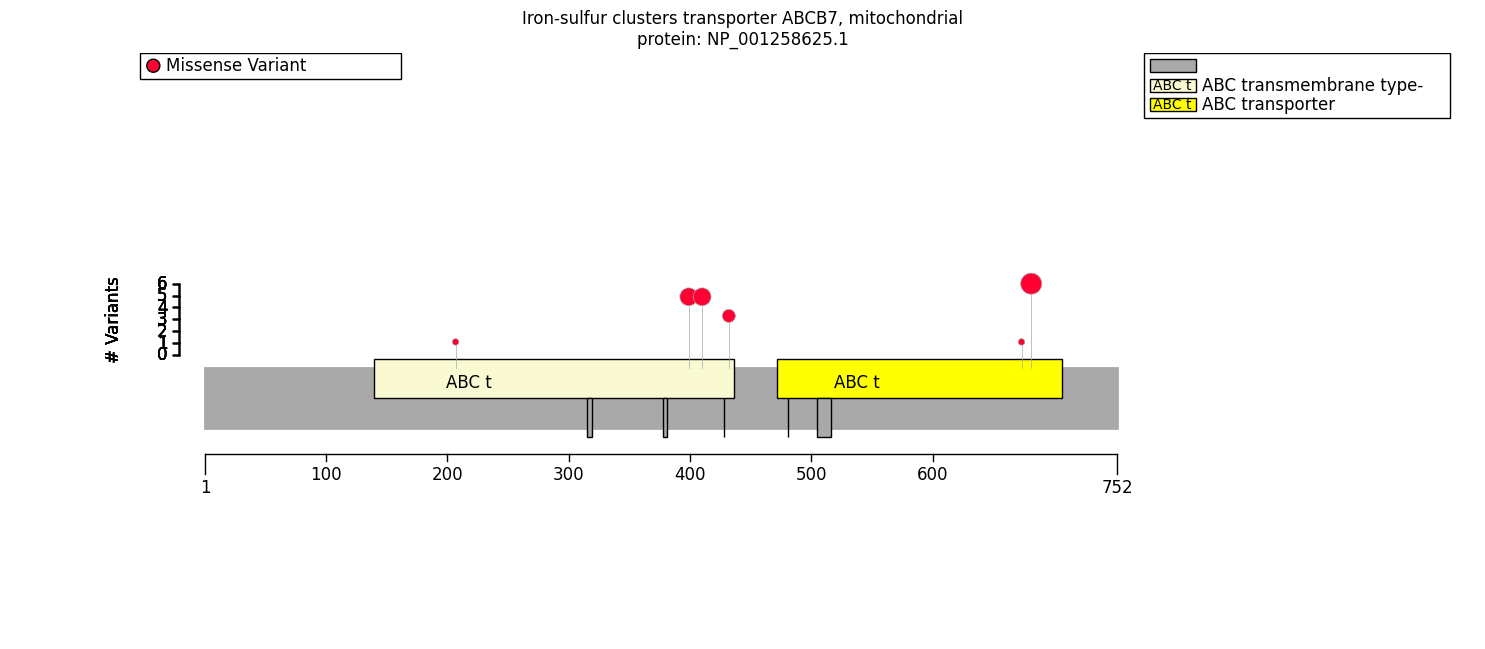

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

abcb7_fig, acadm_ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=acadm_ax,
)
abcb7_fig.tight_layout()

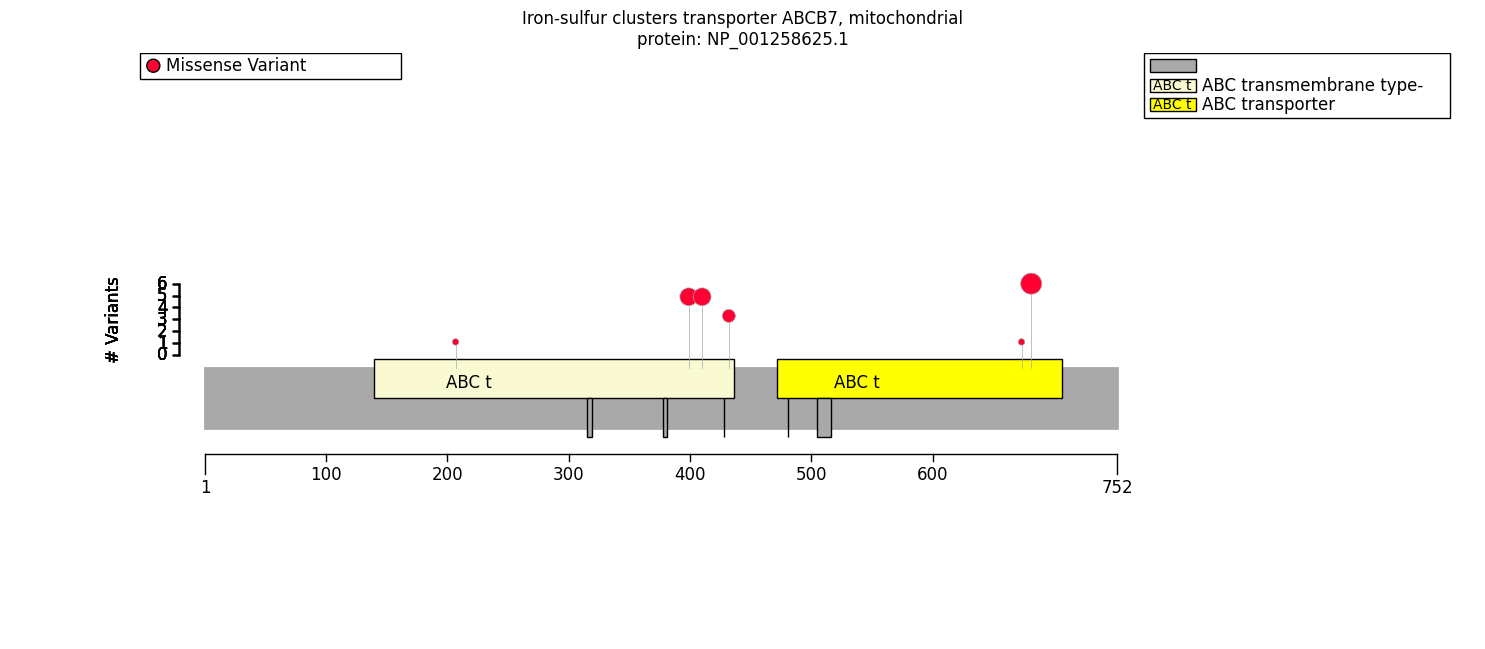

In [6]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

abcb7_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
abcb7_fig.tight_layout()

In [7]:
from gpsea.view import ProteinVariantViewer

viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
11,ABC transmembrane type-1,Domain,141 - 436,p.Val411Leu; p.Glu433Lys; p.Glu208Asp; p.Ile400Met
0,,Binding site,316 - 319,
0,,Binding site,379 - 381,
0,,Binding site,429 - 428,
7,ABC transporter,Domain,473 - 706,p.Gly682Ser; p.Asp674Gly
0,,Binding site,482 - 481,
0,,Binding site,506 - 516,


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.predicate  import protein_feature
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

tmem = protein_feature(protein_metadata=protein_meta, feature_id="ABC transmembrane type-1")

nterm_clf = monoallelic_classifier(
    a_predicate=tmem,
    b_predicate=~tmem,
    a_label="ABC transmembrane type-1",
    b_label="Other region") 

tmem_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(tmem_result)

Code,Reason,Count
HMF03,Skipping term because of a child term with the same individual counts,9
HMF05,Skipping term because one genotype had zero observations,3
HMF08,Skipping general term,40
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,85


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=tmem_result)

Allele group,ABC transmembrane type-1,Other region,Corrected p values,p values
Postural instability [HP:0002172],2/2 (100%),7/7 (100%),1.0,1.0
Abnormal cerebellum morphology [HP:0001317],3/3 (100%),6/6 (100%),1.0,1.0
Morphological central nervous system abnormality [HP:0002011],3/3 (100%),7/7 (100%),1.0,1.0
Abnormal brain morphology [HP:0012443],3/3 (100%),7/7 (100%),1.0,1.0
Nystagmus [HP:0000639],4/4 (100%),5/5 (100%),1.0,1.0
Nonprogressive cerebellar ataxia [HP:0002470],5/5 (100%),6/6 (100%),1.0,1.0
Abnormal reflex [HP:0031826],7/7 (100%),1/1 (100%),1.0,1.0
Anemia [HP:0001903],8/8 (100%),1/1 (100%),1.0,1.0
Global developmental delay [HP:0001263],8/8 (100%),7/7 (100%),1.0,1.0
Dysarthria [HP:0001260],8/8 (100%),7/7 (100%),1.0,1.0


In [11]:
from gpsea.analysis.predicate import variant_key
g682s = variant_key("X_75053585_75053585_C_T") #c.2044G>A	p.Gly682Ser
g682s_predicate = monoallelic_classifier(
    a_predicate=g682s,
    b_predicate= ~g682s,
    a_label='p.Gly682Ser', 
    b_label='Other variant',
)

In [12]:
g682s_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=g682s_predicate,
    pheno_clfs=pheno_clfs,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, g682s_result)

Allele group,p.Gly682Ser,Other variant,Corrected p values,p values
Nystagmus [HP:0000639],4/4 (100%),5/5 (100%),1.0,1.0
Ataxia [HP:0001251],6/6 (100%),10/10 (100%),1.0,1.0
Abnormal cerebellum morphology [HP:0001317],6/6 (100%),3/3 (100%),1.0,1.0
Postural instability [HP:0002172],6/6 (100%),3/3 (100%),1.0,1.0
Morphological central nervous system abnormality [HP:0002011],6/6 (100%),4/4 (100%),1.0,1.0
Abnormal brain morphology [HP:0012443],6/6 (100%),4/4 (100%),1.0,1.0
Nonprogressive cerebellar ataxia [HP:0002470],6/6 (100%),5/5 (100%),1.0,1.0
Global developmental delay [HP:0001263],6/6 (100%),9/9 (100%),1.0,1.0
Dysarthria [HP:0001260],6/6 (100%),9/9 (100%),1.0,1.0
Abnormal communication [HP:0034434],6/6 (100%),9/9 (100%),1.0,1.0


In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary
result_list = (
    GPAnalysisResultSummary.from_multi(
        result=tmem_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=g682s_result,
    )
)


abcb7_caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=result_list,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=abcb7_caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
ABC transmembrane type-1,Other region,12,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Gly682Ser,Other variant,10,0


In [15]:
summarizer.process_latex(report=report, protein_fig=abcb7_fig)

Figure saved to ../../supplement/img/ABCB7_protein_diagram-draft.pdf
Output to ../../supplement/tex/ABCB7_summary_draft.tex
